## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 7*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------



#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [8]:
from skimage import io, color
from skimage.morphology import disk, erosion, dilation, opening, closing
import matplotlib.pyplot as plt

Aplicar diferentes operaciones morfologicas a las siguientes imagenes en escala de grises (si la imagen no esta en grises,
primero convertir a escala de grises): butterfly.jpeg, quetzalgris.png, chestXray.jpeg.

In [9]:

# Function to apply morphological operations
def apply_morphological_operations(image_path):
    # Load the image
    image = io.imread(image_path)
    
    # Check if the image is not in grayscale and convert it if necessary
    if len(image.shape) == 3 and image.shape[2] == 4:
        # Convert RGBA to RGB by discarding the alpha channel
        image = image[..., :3]
    if len(image.shape) == 3:
        image_gray = color.rgb2gray(image)
    else:
        image_gray = image

    # Define the structuring element
    selem = disk(6)

    # Apply morphological operations
    eroded = erosion(image_gray, selem)
    dilated = dilation(image_gray, selem)
    opened = opening(image_gray, selem)
    closed = closing(image_gray, selem)

    # Return the images
    return {
        'original': image_gray,
        'erosion': eroded,
        'dilation': dilated,
        'opening': opened,
        'closing': closed
    }


In [10]:
# Apply operations to each image and store the result
butterfly_results = apply_morphological_operations('./img/butterfly.jpeg')
quetzal_results = apply_morphological_operations('./img/quetzalgris.png')
chestxray_results = apply_morphological_operations('./img/chestxray.jpeg')

butterfly_results, quetzal_results, chestxray_results

({'original': array([[0.45587216, 0.45587216, 0.45587216, ..., 0.49761843, 0.49761843,
          0.49761843],
         [0.45587216, 0.45587216, 0.45587216, ..., 0.49761843, 0.49761843,
          0.49761843],
         [0.45587216, 0.45587216, 0.45587216, ..., 0.49761843, 0.49761843,
          0.49761843],
         ...,
         [0.48109882, 0.48109882, 0.48109882, ..., 0.48275765, 0.48275765,
          0.48275765],
         [0.48109882, 0.48109882, 0.48109882, ..., 0.48275765, 0.48275765,
          0.48275765],
         [0.48109882, 0.48109882, 0.48109882, ..., 0.48275765, 0.48275765,
          0.48275765]]),
  'erosion': array([[0.45587216, 0.45587216, 0.45587216, ..., 0.49761843, 0.49761843,
          0.49761843],
         [0.45587216, 0.45587216, 0.45587216, ..., 0.49761843, 0.49761843,
          0.49761843],
         [0.45587216, 0.45587216, 0.45587216, ..., 0.49761843, 0.49761843,
          0.49761843],
         ...,
         [0.48109882, 0.48109882, 0.48109882, ..., 0.48275765, 0.

In [11]:
# Correcting the code to properly handle the RGBA images and displaying the results

# Function to apply morphological operations and display results
def apply_and_display_morphological_operations(image_path):
    # Load the image
    image = io.imread(image_path)
    
    # Check if the image is not in grayscale and convert it if necessary
    if image.ndim == 3 and image.shape[2] == 4:
        # Image has an alpha channel, which we need to remove
        image = color.rgba2rgb(image)
    if image.ndim == 3 and image.shape[2] == 3:
        # Convert RGB to grayscale
        image_gray = color.rgb2gray(image)
    else:
        image_gray = image

    # Define the structuring element
    selem = disk(6)

    # Apply morphological operations
    eroded = erosion(image_gray, selem)
    dilated = dilation(image_gray, selem)
    opened = opening(image_gray, selem)
    closed = closing(image_gray, selem)

    # Plot and display the images
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    ax = axes.ravel()

    ax[0].imshow(image_gray, cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].imshow(eroded, cmap='gray')
    ax[1].set_title('Erosion')
    ax[1].axis('off')

    ax[2].imshow(dilated, cmap='gray')
    ax[2].set_title('Dilation')
    ax[2].axis('off')

    ax[3].imshow(opened, cmap='gray')
    ax[3].set_title('Opening')
    ax[3].axis('off')

    ax[4].imshow(closed, cmap='gray')
    ax[4].set_title('Closing')
    ax[4].axis('off')

    # Removing the 6th subplot as we only have 5 images to display
    fig.delaxes(axes[1][2])
    plt.tight_layout()
    plt.show()

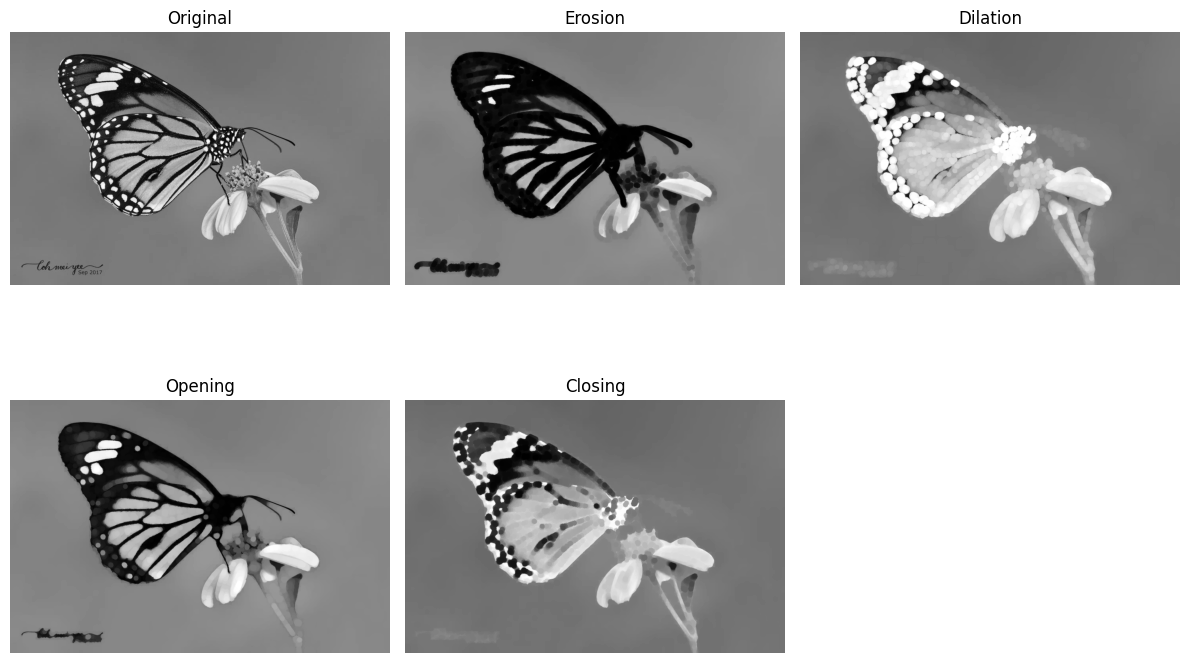

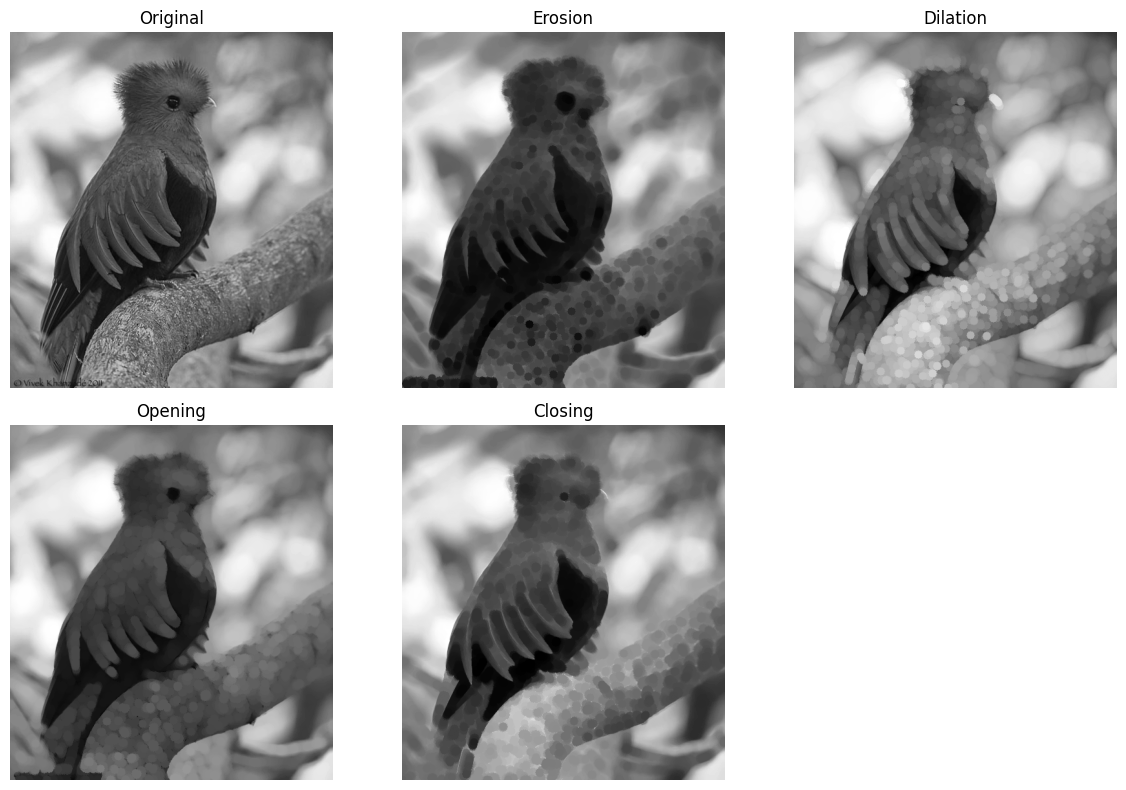

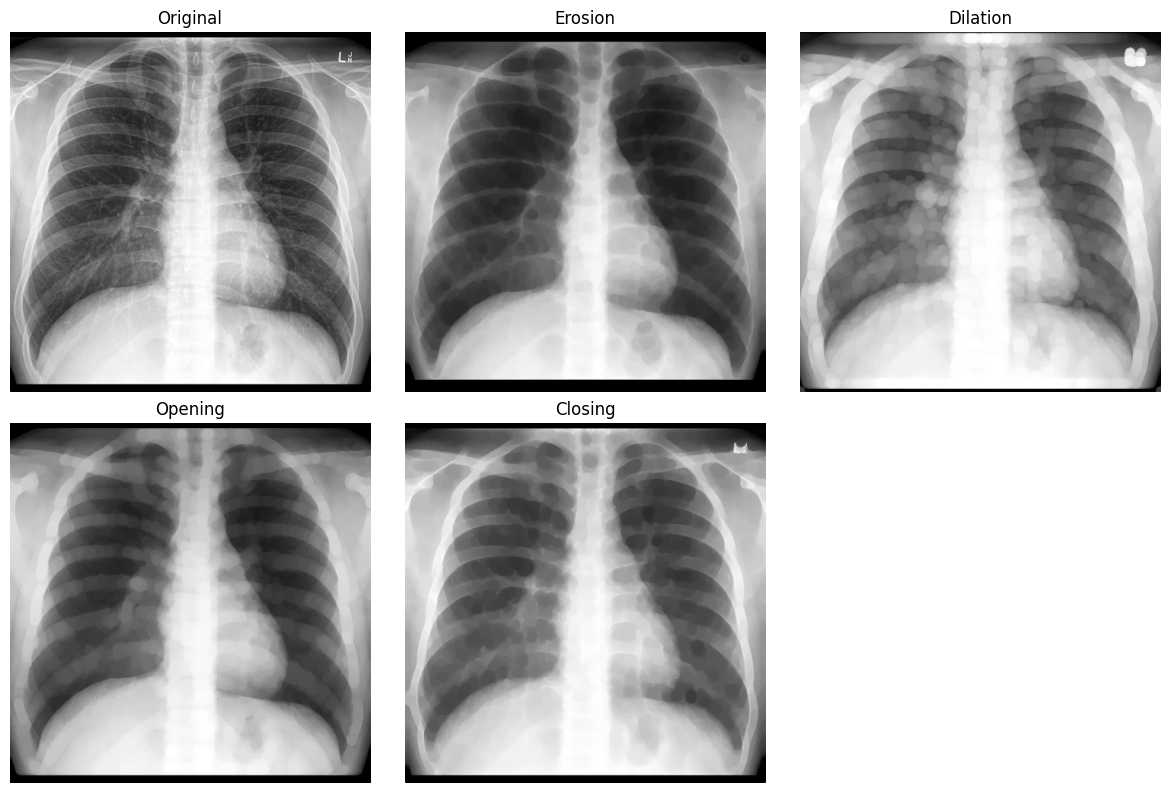

In [12]:

# Apply operations and display results for each image
apply_and_display_morphological_operations('./img/butterfly.jpeg')
apply_and_display_morphological_operations('./img/quetzalgris.png')
apply_and_display_morphological_operations('./img/chestxray.jpeg')

Explicar

- ¿Cual es el efecto de aplicar dilatacion y erosion a estas imagenes?
- ¿Cual es el efecto de aplicar opening y closing a estas imagenes?
- ¿Que hace el white top-hat? ¿Para que puede ser util?



### Efecto de la Erosión y la Dilatación en las Imágenes
- Erosión: Reduce los objetos y elimina pequeños detalles.
- Dilatación: Aumenta los objetos y puede cerrar huecos pequeños.

### Efecto del Opening y el Closing en las Imágenes
- Opening (Apertura): Limpia el ruido de fondo y suaviza contornos del objeto.
- Closing (Cierre): Rellena huecos internos y une objetos cercanos.

### Función del White Top-Hat
- White Top-Hat: Resalta detalles pequeños y brillantes que son más pequeños que el elemento estructurante. Es útil para detectar elementos menores en imágenes como partículas o imperfecciones.
